LAB M.103 Sklearn Model TELCO CHURN
Author: Cindy Lund

A Model to predecit churn for a telecommunications company. Customer churn is when customers stop using a company's services. Predicting churn helps companies take proactive measures to retain customers.


In [2]:
#Step 1: Load & Explore the Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import os
os.getcwd()


'c:\\Users\\cindy\\OneDrive\\Documents\\AI Ironhack Coursework\\vscode101\\WEEK01\\Lab M1.03 - sklearn Model Training + Evaluation'

In [4]:
os.listdir()


['feature_distributions.png',
 'knn_k_comparison.png',
 'LAB M. 103 Sklearn Model BREAST Cancer Model.ipynb',
 'LAB M. 103 Sklearn Model Training & Evaluation Report.docx',
 'LAB M1.03 Telco Customer Churn.ipynb',
 'Screenshots Breast Cancer',
 'Screenshots Telco',
 'Telco-Customer-Churn.csv']

In [5]:
import pandas as pd

df = pd.read_csv("Telco-Customer-Churn.csv")
print("Dataset loaded successfully!")
df.shape


Dataset loaded successfully!


(7043, 21)

In [6]:
#Basic exploration (shape, columns, dtypes, missing values)
print("Shape (rows, columns):", df.shape)

print("\nColumns:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0] if (missing > 0).any() else "✓ No missing values found (as NaN).")


Shape (rows, columns): (7043, 21)

Columns:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

Missing values p

In [7]:
# Check Target distribution (how many churned vs not churned)
print("\nTarget distribution (Churn):")
print(df["Churn"].value_counts())
print("\nTarget distribution (percent):")
print((df["Churn"].value_counts(normalize=True) * 100).round(2))



Target distribution (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Target distribution (percent):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


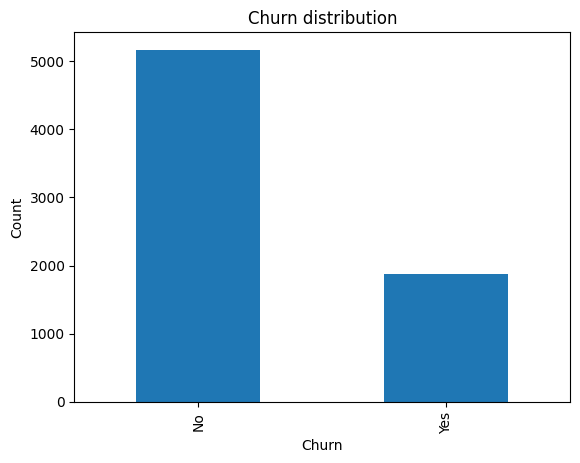

In [8]:
#Quick visuals (simple + useful) Bar chart for target distribution
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


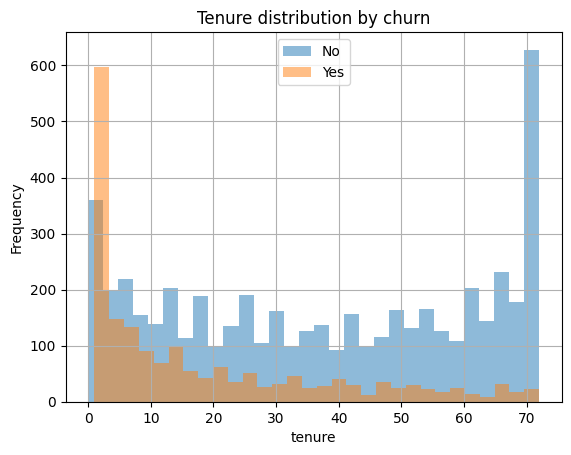

In [9]:
#Tenure distribution by churn (often very informative)
plt.figure()
df[df["Churn"] == "No"]["tenure"].hist(bins=30, alpha=0.5, label="No")
df[df["Churn"] == "Yes"]["tenure"].hist(bins=30, alpha=0.5, label="Yes")
plt.title("Tenure distribution by churn")
plt.xlabel("tenure")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Data Preprocessing (Customer Churn)
Objective

Prepare the churn dataset so it can be used by a KNN classifier (which requires numeric data and no missing values).

In [11]:
#Inspect data types again (sanity check)
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [12]:
#Fix TotalCharges
# Convert TotalCharges to numeric, forcing invalid values to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check missing values after conversion
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Fix missing values in TotalCharges (if any) - we can use median imputation for simplicity
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
df.isnull().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64